<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/combined(w2v).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
url0='https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataISEAR.csv'
df = pd.read_csv(url0)

In [16]:
df.emosi.value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1050
Name: emosi, dtype: int64

In [ ]:
# df=df.drop(df[df['emosi'] == 'shame'].sample(frac=1).index)
# df=df.drop(df[df['emosi'] == 'guilt'].sample(frac=1).index)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
df2 = pd.read_csv('/content/drive/MyDrive/twitter_prosessed.csv')

In [18]:
df3 = pd.read_csv('/content/drive/MyDrive/idwiki_new_lower.txt', delimiter = "\t")
df3.columns = ["arti"]

preputama : lower case

In [19]:
df['dokumen']=df['dokumen'].str.lower()
# print(df.iloc[4,1])

In [20]:
df2['tweet']=df2['tweet'].str.lower()

In [21]:
df3['arti']=df3['arti'].str.lower()

preputama : Pembersihan noise (over enter and space)

In [22]:
df=df.replace(' \n', ' ', regex=True)
df=df.replace('   ', ' ', regex=True)
df=df.replace('  ', ' ', regex=True)

In [23]:
df2=df2.replace(' \n', ' ', regex=True)
df2=df2.replace('   ', ' ', regex=True)
df2=df2.replace('  ', ' ', regex=True)

In [24]:
df3=df3.replace(' \n', ' ', regex=True)
df3=df3.replace('   ', ' ', regex=True)
df3=df3.replace('  ', ' ', regex=True)

preptambah : expand contractions

In [25]:
!pip install contractions
import contractions

     |████████████████████████████████| 321 kB 4.9 MB/s 
     |████████████████████████████████| 284 kB 16.9 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85453 sha256=be6092f1c54b8f12a7f90d865a887fdf04efcf0695d39e497a7b7ed60b9666f6
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [26]:
expanded_words = []
for word in df.dokumen:
  expanded_words.append(contractions.fix(word))
df.dokumen=expanded_words

In [27]:
expanded_words = []
for word in df2.tweet:
  expanded_words.append(contractions.fix(word))
df2.tweet=expanded_words

In [28]:
expanded_words = []
for word in df3.arti:
  expanded_words.append(contractions.fix(word))
df3.arti=expanded_words

preputama : cleansing punctuation

In [29]:
df['dokumen'] = df['dokumen'].str.replace(r'[^\w\s]+', '')

In [30]:
df2['tweet'] = df2['tweet'].str.replace(r'[^\w\s]+', '')

In [31]:
df3['arti'] = df3['arti'].str.replace(r'[^\w\s]+', '')

preputama : cleansing number

In [32]:
!pip install tweet-preprocessor
import preprocessor as p

In [33]:
p.set_options(p.OPT.NUMBER)

In [34]:
sementara=[]
for word in df.dokumen:
  sementara.append(p.clean(word))
df.dokumen=sementara

In [35]:
sementara=[]
for word in df2.tweet:
  sementara.append(p.clean(word))
df2.tweet=sementara

In [36]:
sementara=[]
for word in df3.arti:
  sementara.append(p.clean(word))
df3.arti=sementara

preptambah : remove stopword

In [37]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [38]:
pat = r'\b(?:{})\b'.format('|'.join(stop))

In [39]:
df['dokumen'] = df['dokumen'].str.replace(pat, '')
df['dokumen'] = df['dokumen'].str.replace(r'\s+', ' ')

In [40]:
df2['tweet'] = df2['tweet'].str.replace(pat, '')
df2['tweet'] = df2['tweet'].str.replace(r'\s+', ' ')

In [41]:
df3['arti'] = df3['arti'].str.replace(pat, '')
df3['arti'] = df3['arti'].str.replace(r'\s+', ' ')

tokenizing

In [42]:
sentences = [word_tokenize(x) for x in df.dokumen] 
df.dokumen=sentences

In [43]:
sentences = [word_tokenize(x) for x in df2.tweet]
df2.tweet=sentences

In [44]:
sentences = [word_tokenize(x) for x in df3.arti]
df3.arti=sentences

preptambah : Lemmatization

In [45]:
from nltk.stem.snowball import SnowballStemmer
# Use English stemmer.
stemmer = SnowballStemmer("english")

In [46]:
# temp = df.dokumen.apply(lambda x: [stemmer.stem(y) for y in x])
df['dokumen'].apply(lambda x: [stemmer.stem(y) for y in x])

0       [day, feel, close, partner, friend, feel, peac...
1       [everi, time, imagin, someon, love, could, con...
2               [obvious, unjust, treat, possibl, elucid]
3       [think, short, time, live, relat, period, life...
4       [gather, found, involuntarili, sit, next, two,...
                              ...                        
7511    [two, year, back, someon, invit, tutor, grandd...
7512    [taken, respons, someth, prepar, howev, fail, ...
7513    [home, heard, loud, sound, spit, outsid, door,...
7514          [homework, teacher, ask, us, scold, immedi]
7515    [shout, younger, brother, alway, afraid, call,...
Name: dokumen, Length: 7516, dtype: object

In [47]:
df2['tweet'].apply(lambda x: [stemmer.stem(y) for y in x])

0          [upset, can, not, updat, facebook, text, might...
1          [dive, mani, time, ball, manag, save, rest, go...
2                     [whole, bodi, feel, itchi, like, fire]
3                             [behav, i, mad, can, not, see]
4                                              [whole, crew]
                                 ...                        
1596959                     [woke, school, best, feel, ever]
1596960     [thewdbcom, cool, hear, old, walt, interview, â]
1596961                   [readi, mojo, makeov, ask, detail]
1596962    [happi, th, birthday, boo, alll, time, tupac, ...
1596963                                              [happi]
Name: tweet, Length: 1596964, dtype: object

In [48]:
df3['arti'].apply(lambda x: [stemmer.stem(y) for y in x])

0        [autism, disord, character, difficulti, social...
1        [diffus, reflect, sunlight, relat, various, su...
2        [first, letter, first, vowel, modern, english,...
3        [alabama, state, southeastern, region, unit, s...
4        [potteri, paint, date, bc, achill, trojan, war...
                               ...                        
20704    [heurist, rout, system, use, describ, deliveri...
20705    [hierarch, rout, method, rout, network, base, ...
20706    [high, perform, equip, describ, equip, perform...
20707    [hop, type, jump, hop, hop, may, also, refer, ...
20708    [horn, often, refer, horn, acoust, conic, bell...
Name: arti, Length: 20709, dtype: object

save df

In [ ]:
# df.to_csv(r'dataisear(preptambah).csv', index = False)

gabung corpus

In [ ]:
# sent=df.dokumen

In [ ]:
sent=df2.tweet.append(df.dokumen,ignore_index=True)

In [49]:
sent=df3.arti.append(df2.tweet.append(df.dokumen,ignore_index=True),ignore_index=True)

word2ec

In [50]:
from gensim.models import Word2Vec

In [51]:
w2v = Word2Vec(sent, window=5, min_count=1, workers=12, sg=1, iter=1)

In [ ]:
# (sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, 
#  seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=hash, iter=5, 
#  null_word=0, trim_rule=None, sorted_vocab=1, batch_words=MAX_WORDS_IN_BATCH, compute_loss=False, callbacks=(), max_final_vocab=None)

In [52]:
cek=w2v.wv

cek model

In [ ]:
words=w2v.wv.vocab
# words
cek.vector_size

100

In [ ]:
cek.vectors.shape

(442381, 100)

In [ ]:
len(cek.vocab)

9192

In [ ]:
cek["moment"]

array([ 0.27969   , -0.04074705, -0.2732618 ,  0.17059597, -0.0566575 ,
        0.22154164,  0.04799413, -0.22830814,  0.46554455,  0.47342637,
       -0.06254962, -0.03081691, -0.00158358, -0.09411842, -0.4625419 ,
       -0.29507542, -0.02135062, -0.14482166, -0.25527653,  0.06358406,
       -0.06260474,  0.13054442,  0.14356533, -0.16021872, -0.09310925,
        0.22482166,  0.15930392,  0.27778736, -0.2941564 , -0.12835085,
        0.2778452 , -0.02994143, -0.07942306, -0.18619187,  0.11510776,
       -0.10212002,  0.23349683,  0.43196627, -0.24234013,  0.09918298,
       -0.21515411,  0.13683397,  0.14239877,  0.22898738, -0.0880629 ,
       -0.20002627, -0.25326008,  0.05245483, -0.42636654,  0.30673406,
       -0.16179715, -0.20850863,  0.18761359,  0.00555527, -0.19485697,
        0.1494716 , -0.03088063,  0.15144156,  0.22128993,  0.08645695,
        0.0956853 , -0.18642326,  0.1678185 ,  0.0259022 , -0.2759077 ,
        0.0111359 , -0.12221067,  0.30497456,  0.38536498,  0.03

ekstraksi fitur

In [53]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
for senten in df.dokumen:
  for word in senten:
    temp=np.add(temp,cek[word])
  temp=temp/len(senten)
  ekstrak.append(temp)
has_vec=ekstrak

In [54]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(7516, 100)
(7516,)


klasifikasi svm

In [55]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
# langsung cari score

# clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# scores = cross_val_score(clf, X, y, cv=10)
# # scores.mean()

0.19651563872283764

conf matrix dan akurasi

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
#  class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

In [ ]:
# cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, 
# pre_dispatch='2*n_jobs', method='predict')

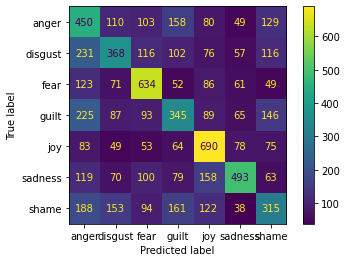

0.4383980840872805
(0.4403081713356142, 0.4373832618347047, 0.4350401488927857, None)


In [57]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()
print(accuracy_score(y, y_pred))
print(precision_recall_fscore_support(y, y_pred, average='macro'))

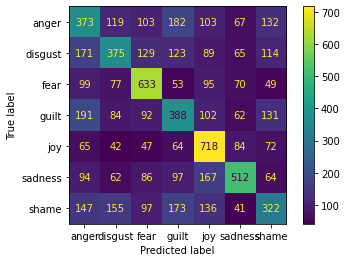

0.4418573709419904
(0.4388206597774179, 0.44094958923093713, 0.4369244142495242, None)


In [58]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()
print(accuracy_score(y, y_pred))
print(precision_recall_fscore_support(y, y_pred, average='macro'))

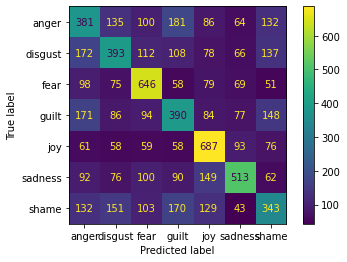

0.4461149547631719
(0.4424598688642037, 0.44529675371715616, 0.4422530664289801, None)


In [59]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()
print(accuracy_score(y, y_pred))
print(precision_recall_fscore_support(y, y_pred, average='macro'))